In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [4]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
# n_estimators=100 -> 모델의 개수 설정

In [5]:
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [6]:
ada.score(x_train, y_train)

1.0

In [7]:
ada.score(x_test, y_test)

0.986013986013986

In [8]:
n_features = cancer.data.shape[1]
# 컬럼 정의

In [9]:
import numpy as np

In [10]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

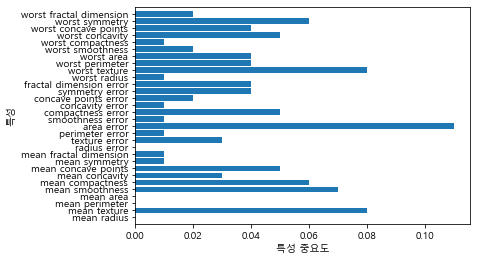

In [11]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()
# 바 그래프가 없는 애들으느 사용되지 않은 특성들이다.

### Gradient Boost classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
# 하이퍼파라미터 설정

In [14]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [15]:
gb.score(x_train, y_train)

1.0

In [16]:
gb.score(x_test, y_test)

0.965034965034965

### 사전 가지치기

In [17]:
gb = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=1)

In [18]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [19]:
gb.score(x_train, y_train)

0.9906103286384976

In [20]:
gb.score(x_test, y_test)

0.972027972027972

### 학습률 낮추기

In [21]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.01)

In [22]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [23]:
gb.score(x_train, y_train)

0.9882629107981221

In [24]:
gb.score(x_test, y_test)
# 사전 가지치기를 했을 때 보다 과대적합을 낮출 수 있다.

0.965034965034965

### 회귀

In [25]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [28]:
ada = AdaBoostRegressor(n_estimators=100, random_state=42)

In [29]:
ada.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [30]:
pred = ada.predict(x_test)
pred

array([33.72526316, 29.26949153, 19.52264151, 24.32      , 12.84666667,
       11.44736842, 17.22987013, 21.12105263, 21.81927711, 17.2254717 ,
       26.83561644, 19.63665158, 30.07446809, 44.76774194, 35.33943662,
       11.33764706, 22.44745763, 21.50674847, 26.39104478, 21.50674847,
       22.44745763, 21.38769231, 16.81512605, 25.02808219, 21.360625  ,
       34.40676329, 25.97052632, 21.38769231, 12.79655172, 21.69342723,
       22.88764045, 17.9377907 , 23.63247423, 17.50127389, 21.37978723,
       27.00666667, 25.25606061, 21.02610619, 27.0826087 , 11.48444444,
       26.04390244, 19.5375    , 19.77619048, 32.46325301, 38.16307692,
       44.2       , 16.54458599, 17.50127389, 21.37978723, 19.5375    ,
       25.90769231, 20.29943182, 16.81512605, 11.48444444, 20.37424242,
       22.44745763, 19.21558442, 20.29943182, 29.21067961, 27.00666667,
       26.83561644, 25.39534884, 11.918     , 41.3       , 11.918     ,
       10.89782609, 21.90185185, 21.81927711, 41.55806452, 26.39

In [31]:
ada.score(x_train, y_train)

0.9091096526140002

In [32]:
ada.score(x_test, y_test)

0.8486848995397309

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gb = GradientBoostingRegressor(random_state=0, n_estimators=100, criterion='mse')

In [37]:
gb.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: F

GradientBoostingRegressor(criterion='mse', random_state=0)

In [39]:
pred = gb.predict(x_test)
pred

array([30.53608208, 31.90291463, 17.0937863 , 23.44694972, 15.71911341,
       11.16118532, 14.07220753, 18.77398285, 22.30093083, 16.85369139,
       24.61062242, 20.24694141, 26.98691792, 41.95303606, 34.50099046,
        5.50218444, 21.73047177, 20.18569504, 26.49058462, 20.74698015,
       22.32628752, 21.25186339, 15.87432868, 21.9238306 , 19.11938815,
       36.54632998, 30.11984832, 20.46488922, 13.41066499, 20.98444277,
       21.53214935, 18.96040645, 23.12782212, 15.8811307 , 20.20175017,
       25.58898001, 26.83740027, 17.60204585, 26.51078393, 12.26396119,
       25.86023779, 16.48927048, 17.92959109, 29.1235499 , 43.13191964,
       48.45139673, 14.79374485, 17.24715181, 19.40547235, 18.79125665,
       17.96705306, 21.95691329, 15.92815979,  9.66400372, 18.34335914,
       21.84364514, 16.46810159, 19.46421797, 29.75801155, 26.41313477,
       23.14121335, 21.44768744, 13.46468117, 43.25839271, 10.18962741,
        9.21082251, 22.26627919, 21.35895918, 46.35440332, 25.78

In [40]:
gb.score(x_train, y_train)

0.9824932226688096

In [41]:
gb.score(x_test, y_test)

0.8928630942283894

### XGBoost Classifier

In [48]:
!pip install xgboost

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier

In [12]:
xgb = xgb.XGBClassifier(random_state = 0)

In [13]:
xgb.fit(x_train, y_train)
# 아래와 같은 많은 하이퍼 파라미터가 있다.

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
xgb.score(x_train, y_train)

1.0

In [15]:
xgb.score(x_test, y_test)

0.986013986013986

### 사전 가지치기

In [18]:
xgb = xgb.XGBClassifier(random_state=0, max_depth=1)

In [19]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
xgb.score(x_train, y_train)

0.9976525821596244

In [21]:
xgb.score(x_test, y_test)

0.986013986013986

### 학습률 낮추기

In [22]:
import xgboost as xgb

In [23]:
xgb = xgb.XGBClassifier(random_state=0, learning_rate=0.01)

In [24]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
xgb.score(x_train, y_train)

0.9953051643192489

In [26]:
xgb.score(x_test, y_test)

0.965034965034965

In [27]:
import xgboost as xgb

In [28]:
r = xgb.XGBRegressor(n_estimator=100, learning_rate=0.01, gamma = 0.1, max_depth = 3, random_state=0)

In [29]:
r.fit(x_train, y_train)

[10:13:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=100,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [30]:
pred = r.predict(x_test)
pred

array([0.19552997, 0.79308367, 0.8103186 , 0.80379725, 0.8103186 ,
       0.8103186 , 0.79308367, 0.8103186 , 0.79308367, 0.8103186 ,
       0.3550536 , 0.7865623 , 0.79308367, 0.25202075, 0.35485995,
       0.2196453 , 0.673757  , 0.18788244, 0.18788244, 0.18788244,
       0.18788244, 0.18788244, 0.80608237, 0.8103186 , 0.18788244,
       0.8103186 , 0.8103186 , 0.23810361, 0.8103186 , 0.18788244,
       0.8103186 , 0.18788244, 0.80445296, 0.18909253, 0.8103186 ,
       0.19552997, 0.8103186 , 0.18909253, 0.8085722 , 0.18788244,
       0.36900866, 0.8103186 , 0.25849885, 0.8103186 , 0.6015133 ,
       0.18788244, 0.8103186 , 0.8103186 , 0.8103186 , 0.18788244,
       0.27665752, 0.21831171, 0.18909253, 0.8103186 , 0.8103186 ,
       0.8103186 , 0.79308367, 0.79308367, 0.8103186 , 0.18788244,
       0.19552997, 0.18788244, 0.8103186 , 0.8103186 , 0.27665752,
       0.72977716, 0.18788244, 0.18788244, 0.18788244, 0.8103186 ,
       0.79283935, 0.18788244, 0.8103186 , 0.50746316, 0.18788

In [31]:
r.score(x_train, y_train)

0.793743231047281

In [32]:
r.score(x_test, y_test)

0.7285257682697236

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

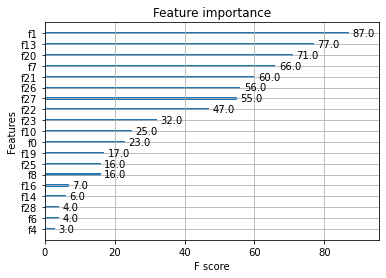

In [33]:
xgb.plot_importance(r) # r = 모델이름